# Maturità 2023 - Problema 1

![TESTO PROBLEMA 1](testo_problema1.png)

In [1]:
# Toolbox simbolico
from sympy import *

x,y = symbols('x,y', real=True)
a,b,c = symbols('a,b,c', real=True)

fparabola = a*(x+2)**2
fcerchio = x**2+y**2+b
fiperbole = x**2-y**2+c

## A.1
> Scrivere un'espressione analitica della funzione $f$ definita a tratti nell'intervallo $[-2,2]$, utilizzando $$y=a(x+2)^2 \quad\quad x^2+y^2+b=0 \quad\quad x^2-y^2+c=0$$ e individuare i valori opportuni per i parametri reali $a$, $b$ e $c$.

### Arco di parabola

In [2]:
# Punto di passaggio P
P = (0,1)
eq = fparabola.subs(x,P[0])-P[1]
asol = solve(eq,a)
asol

[1/4]

In [3]:
fparabola = fparabola.subs(a,asol[0])
print("Equazione di Gamma_1:")
fparabola

Equazione di Gamma_1:


(x + 2)**2/4

### Arco di circonferenza 

In [4]:
# Punto di passaggio P
P = (0,1)
eq = fcerchio.subs([(x,P[0]),(y,P[1])])
bsol = solve(eq,b)
bsol

[-1]

In [5]:
ftmp = fcerchio.subs(b,bsol[0])
fsol = solve(ftmp,y)
display(fsol)
fcerchio = fsol[1]
print("Equazione di Gamma_2:")
display(fcerchio)

[-sqrt(1 - x**2), sqrt(1 - x**2)]

Equazione di Gamma_2:


sqrt(1 - x**2)

### Arco di iperbole

In [6]:
# Punto di passaggio P
P = (1,0)
eq = fiperbole.subs([(x,P[0]),(y,P[1])])
csol = solve(eq,c)
csol

[-1]

In [7]:
ftmp = fiperbole.subs(c,csol[0])
fsol = solve(ftmp,y)
display(fsol)
fiperbole = fsol[1]
print("Equazione di Gamma_3:")
display(fiperbole)

[-sqrt(x**2 - 1), sqrt(x**2 - 1)]

Equazione di Gamma_3:


sqrt(x**2 - 1)

In [8]:
# Valutazione in x=2 dell'iperbole
fiperbole.subs(x,2)

sqrt(3)

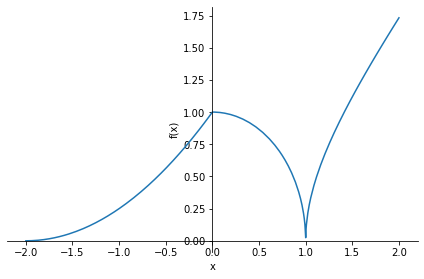

In [9]:
### Funzione
f = Piecewise((fparabola,x<=0), (fcerchio, x<=1), (fiperbole,x<=2))
plot(f,(x,-2,2))

## A.2
> Studiare la derivabilità della funzione $f$ e scrivere le equazioni delle eventuali rette tangenti nei punti di ascissa $$x=-2\quad\quad x=0\quad\quad x=1\quad\quad x=2$$

In [10]:
# Variabili per la retta tangente
x0,y0 = symbols('x0,y0', real=True)

In [11]:
# Derivate nei singoli tratti
fparabola_prime = diff(fparabola,x)
fcerchio_prime = diff(fcerchio,x)
fiperbole_prime = diff(fiperbole,x)
print("Derivate:")
display(fparabola_prime, fcerchio_prime, fiperbole_prime)

Derivate:


x/2 + 1

-x/sqrt(1 - x**2)

x/sqrt(x**2 - 1)

### Caso $x=-2$

In [12]:
m = fparabola_prime.subs(x,-2)
print("m:")
display(m)

P = (-2,0)
x0, y0 = P

eq_tan_x0 = m*(x-x0) + y0
print("Retta tangente:")
eq_tan_x0

m:


0

Retta tangente:


0

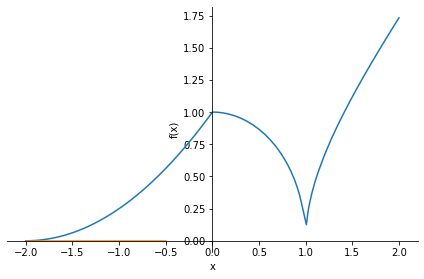

In [13]:
# Disegno
p1 = plot(f,(x,-2,2), show=False)
p2 = plot(eq_tan_x0,(x,-2,-1/2), show=False)
p1.extend(p2)

p1.show()

### Caso $x=0$

In [14]:
m1 = limit(fparabola_prime,x,0,'-')
print("m(-):")
display(m1)

m2 = limit(fcerchio_prime,x,0,'+')
print("m(+):")
display(m2)

m(-):


1

m(+):


0

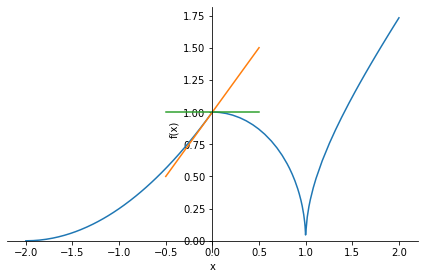

In [15]:
# Disegno le due tangenti
P = (0,1)
x0, y0 = P

eq_tan_1 = m1*(x-x0) + y0
eq_tan_2 = m2*(x-x0) + y0

p1 = plot(f,(x,-2,2), show=False)
p2 = plot(eq_tan_1,(x,-1/2,1/2), show=False)
p3 = plot(eq_tan_2,(x,-1/2,1/2), show=False)
p1.extend(p2)
p1.extend(p3)

p1.show()

### Caso $x=1$

In [16]:
m1 = limit(fcerchio_prime,x,1,'-')
print("m(-):")
display(m1)

m2 = limit(fiperbole_prime,x,1,'+')
print("m(+):")
display(m2)

m(-):


-oo

m(+):


oo

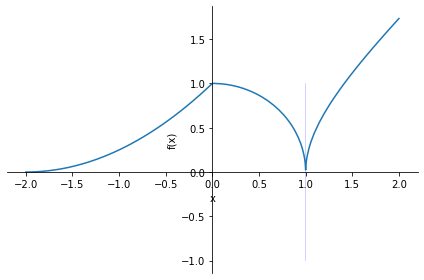

In [17]:
# Disegno le due tangenti
p1 = plot(f,(x,-2,2), show=False)
p2 = plot_implicit(Eq(x, 1), (x,0,2), (y,-1,1), show=False)
p1.extend(p2)

p1.show()

### Caso $x=2$

In [18]:
m = fiperbole_prime.subs(x,2)
print("m:")
display(m)

P = (2,fiperbole.subs(x,2))
x0, y0 = P

eq_tan_4 = m*(x-x0) + y0
print("Retta tangente:")
eq_tan_4

m:


2*sqrt(3)/3

Retta tangente:


2*sqrt(3)*(x - 2)/3 + sqrt(3)

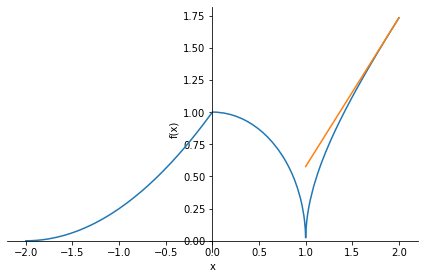

In [19]:
# Disegno
p1 = plot(f,(x,-2,2), show=False)
p2 = plot(eq_tan_4,(x,1,2), show=False)
p1.extend(p2)

p1.show()

## B.1
> A partire dal grafico della funzione $f$, dedurre quello della sua derivata $f'$

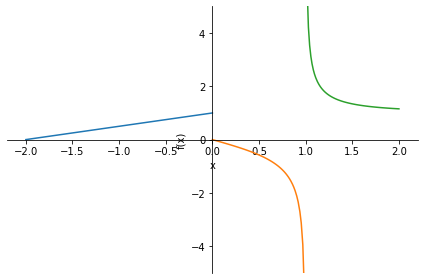

In [20]:
### Funzione derivata prima
fprime = diff(f,x)
p1 = plot(fparabola_prime,(x,-2,0), show=False, ylim=[-5,5])
p2 = plot(fcerchio_prime,(x,0,1), show=False, ylim=[-5,5])
p3 = plot(fiperbole_prime,(x,1,2), show=False, ylim=[-5,5])

p1.extend(p2)
p1.extend(p3)
p1.show()

## B.2
> Individuare gli intervalli di concavità e convessità di $F(x)=\int_{-2}^{x}f(t)dt$

In [21]:
# Parabola > 0
sol = solveset(fparabola_prime>0, x, S.Reals)
sol = sol.intersect(Interval(-2,0))
sol

Interval.Lopen(-2, 0)

In [22]:
# Cerchio < 0
sol = solveset(fcerchio_prime<0, x, S.Reals)
sol = sol.intersect(Interval(0,1))
sol

Interval.open(0, 1)

In [23]:
# Iperbole > 0
sol = solveset(fiperbole_prime>0, x, S.Reals)
sol = sol.intersect(Interval(1,2))
sol

Interval.Lopen(1, 2)

## C.1
> Si consideri la funzione $y={1\over 4}(x+2)^2$, definita nell'intervallo $[-2,0]$ di cui $\Gamma_1$ è il suo grafico rappresentativo. Spiegare perché essa è invertibile e scrivere l'espressione analitica della sua funzione inversa $h$.

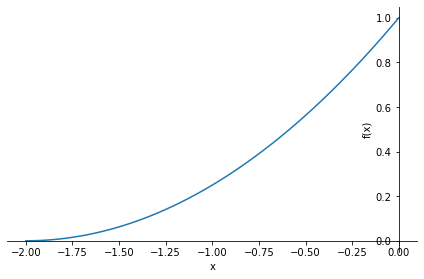

In [24]:
plot(fparabola,(x,-2,0))

## C.2
> Studiare la derivabilità di $h$ e tracciarne il grafico.

In [25]:
parinvs = solve(Eq(y,fparabola),x)
display(parinvs)
# Domionio [0,1]
parinv = parinvs[1].subs(y,x)
display(parinv)

[-2*sqrt(y) - 2, 2*sqrt(y) - 2]

2*sqrt(x) - 2

In [26]:
# Disegno della derivata dell'inversa
parinvder = diff(parinv,x)
display(parinvder)

1/sqrt(x)

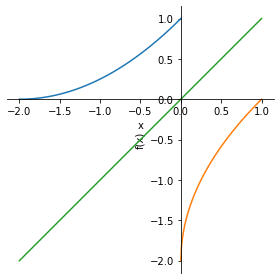

In [27]:
# disegno
p1 = plot(fparabola,(x,-2,0), show=False,aspect_ratio=(1.,1.))
p2 = plot(parinv,(x,0,1), show=False,aspect_ratio=(1.,1.))
p3 = plot(x,(x,-2,1), show=False,aspect_ratio=(1.,1.))

p1.extend(p2)
p1.extend(p3)
p1.show()

## D
> Sia $S$ la regione limitata del secondo quadrante, compresa tra il grafico di $\Gamma_1$ e gli assi cartesiani. Determinare il valore del parametro reale $k$ affinché la retta di equazione $x=k$ divida $S$ in due regioni equivalenti.

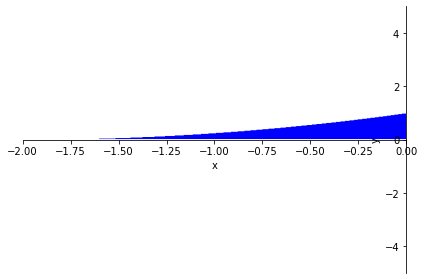

In [28]:
plot_implicit(And(y<fparabola,y >0),(x,-2,0))

In [29]:
# Area
A = integrate(fparabola, (x,-2,0))
A

2/3

In [30]:
k = symbols('k', real=True)

In [31]:
Ak = integrate(fparabola, (x,-2,k))
display(Ak)

solve(Eq(Ak,A/2))

k**3/12 + k**2/2 + k + 2/3

[-2 + 2**(2/3)]